# K-means Clustering Assignment
### Due 04/18/2016
### By Jacob Metzger

#### Instructions:

The dataset we're using today contains information about flowers called an iris.  We're going to use K-Means clustering to atttempt to identify unique types of iris.

Step 1:  Use my method below to identify how many groups are in the dataset.

Step 2:  add the kmeans cluster labels into the dataframe df.


In [1]:
#Standard imports
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

%matplotlib inline

In [2]:
#Load Anderson's Iris dataset from sklearn
iris = datasets.load_iris()
X = iris.data
df = pd.DataFrame(X)
df.columns = iris.feature_names

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Provided by Mike Bernico
# Plots the distortions of clusters against various values of k
def find_k (X, k_range, sample_percent=1):
    """
    k_range: a list of possible k values
    X, the data we're clustering on
    """
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.spatial.distance import cdist
    from sklearn.metrics import pairwise_distances

    N = X.shape[0]
    sampleSize = X.shape[0] * sample_percent

    if sampleSize > 0:
        index = np.arange(np.shape(X)[0])
        np.random.shuffle(index)
        X =  X[index, :]


    mean_distortions=[]
    for k in k_range:
        #cluster using k, then calculate the mean distortion (average distance to closest centroid)
        kmeans_model = KMeans(n_clusters=k, init='k-means++', n_jobs=-1).fit(X)
        mean_distortions.append(sum(np.min(pairwise_distances(X, kmeans_model.cluster_centers_,
                                                              metric='euclidean'),axis=1)) / X.shape[0])


    #visualize results
    plt.plot(k_range, mean_distortions)
    plt.xlabel("K Value")
    plt.ylabel("Mean Distortion")
    plt.title("Elbow Graph for Mean Distortion per K")
    plt.show()

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

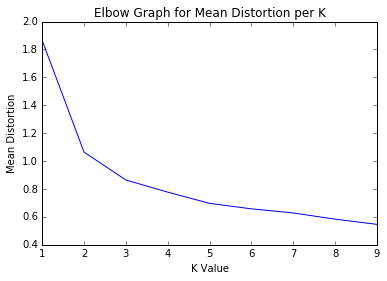

In [6]:
find_k(X_scaled, xrange(1,10))

Note that from the above graph, we see significant reduction in distortion between k=1 and k=2, and a moderate improvement from k=2 to k=5. There's very slight improvement from k=3 to k=4, but thereafter the gains with increasing amount of k are not that great compared to the increased complexity of the model.

Here, it seems most reasonable to select k=3, though 4 or 5 might also be reasonable choices, a priori.

In [7]:
model_3 = KMeans(n_clusters = 3)
model_3.fit(X_scaled)
model_3_labels = model_3.labels_

In [8]:
model_3_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

#### Resultant Clustered Dataset

In [9]:
X_clustered = df.copy()
X_clustered['cluster labels'] = model_3_labels
X_clustered.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster labels
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


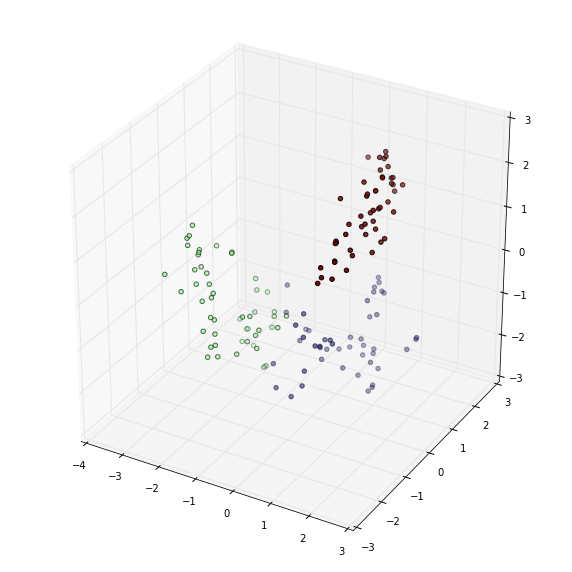

In [10]:
#Visualize results
#Uses TSNE to project clusters to 3 dimensions for plotting
#From Kmeans_Clustering_Lecture by M. Bernico

from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

model = TSNE(n_components=3, learning_rate=12, random_state=10)
X_tsne = model.fit_transform(X_scaled) 
plt.figure(figsize=(10,10))
ax = plt.subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1],X_tsne[:,2], c=model_3_labels)

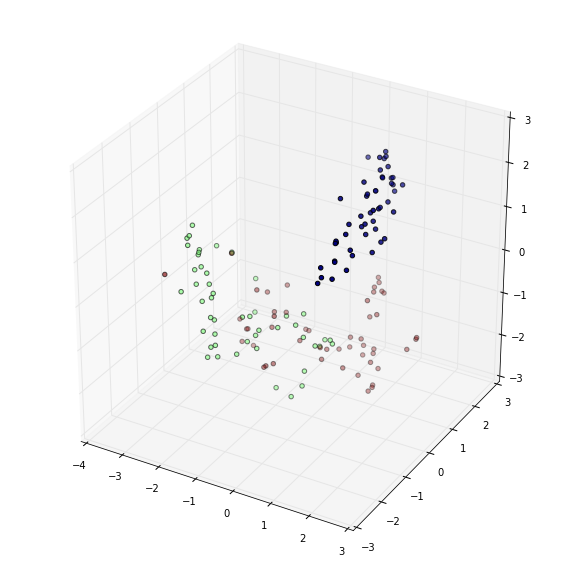

In [11]:
#Compare to known true results (k=3)

model = TSNE(n_components=3, learning_rate=12, random_state=10)
X_tsne = model.fit_transform(X_scaled) 
plt.figure(figsize=(10,10))
ax = plt.subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1],X_tsne[:,2], c=iris.target) #Pull the true target classes from the Iris dataset

### Evaluation:

KMeans performed reasonably in being able to cluster the Iris data, both in its use in estimating the number of true (salient) clusters from cluster distortion and in actual clustering results. KMeans does demonstrate some difficulty in the case of the non-linearly separable clusters (shown as the lower two clusters in the visualization above). However, most of this difficulty appears to be near the cluster boundaries (at least as shown via TSNE projection), leaving the more paradigmatic cases correct. 